# Computational Methods for Finance - Westminster Business School

## Individual Assessment

### Report on Financial Derivatives - Hui Gong

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as si
import os 
import scipy.stats as si
from mpl_toolkits.mplot3d import Axes3D

#### Importing and analysing the data

In [2]:
data = yf.download("AAPL", start="2020-10-01", end="2021-10-31")
# Uploading the Yahoo Finance data through the yfinance package

[*********************100%***********************]  1 of 1 completed


In [3]:
data.head()
# Gives us the head or the top part of the data (the earliest values)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-09-30,113.790001,117.260002,113.620003,115.809998,114.902191,142675200
2020-10-01,117.639999,117.720001,115.830002,116.790001,115.874519,116120400
2020-10-02,112.889999,115.370003,112.220001,113.019997,112.134056,144712000
2020-10-05,113.910004,116.650002,113.550003,116.500000,115.586784,106243800
2020-10-06,115.699997,116.120003,112.250000,113.160004,112.272972,161498200


In [4]:
data.tail()
# Gives us the tail or the bottom part fo the data (the latest values)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-10-25,148.679993,149.369995,147.619995,148.639999,148.423386,50720600
2021-10-26,149.330002,150.839996,149.009995,149.320007,149.102402,60893400
2021-10-27,149.360001,149.729996,148.490005,148.850006,148.633087,56094900
2021-10-28,149.820007,153.169998,149.720001,152.570007,152.347656,100077900
2021-10-29,147.220001,149.940002,146.410004,149.800003,149.581696,124850400


In [5]:
data.describe().round(2)
# Data description rounded to two decimals

,Open,High,Low,Close,Adj Close,Volume
count,274.00,274.00,274.00,274.00,274.00,2.740000e+02
mean,132.39,133.78,130.99,132.43,131.89,9.546562e+07
std,11.46,11.39,11.52,11.52,11.69,3.245797e+07
min,109.11,110.68,107.32,108.77,107.92,4.639770e+07
25%,123.35,124.69,121.52,123.02,122.41,7.417418e+07
50%,131.02,132.46,129.47,131.12,130.43,8.896920e+07
75%,143.46,144.71,141.97,143.22,142.80,1.114588e+08
max,156.98,157.26,154.39,156.69,156.46,2.623305e+08


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

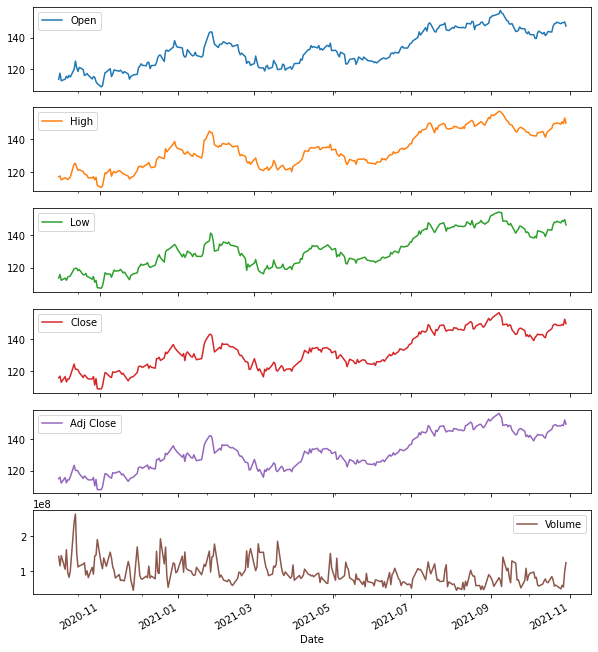

In [6]:
data.plot(figsize=(10, 12), subplots=True)
# We plot the different columns of the data set but we want to focus here on the adjusted close (purple)

#### Further analysis on the returns of AAPL

In [7]:
returns = np.log(data / data.shift(1))
returns.head().round(4)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-09-30,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-01,0.0333,0.0039,0.0193,0.0084,0.0084,-0.2059
2020-10-02,-0.0412,-0.0202,-0.0317,-0.0328,-0.0328,0.2201
2020-10-05,0.0090,0.0110,0.0118,0.0303,0.0303,-0.3090
2020-10-06,0.0156,-0.0046,-0.0115,-0.0291,-0.0291,0.4188


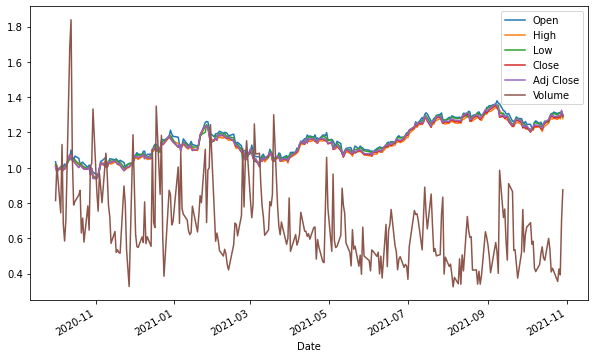

In [8]:
returns.cumsum().apply(np.exp).plot(figsize=(10, 6));
# Plotting the graph of the returns

In [9]:
data_close = data['Close']
data_return = np.log(data_close).diff()
data_return.head()

Date
2020-09-30         NaN
2020-10-01    0.008427
2020-10-02   -0.032813
2020-10-05    0.030327
2020-10-06   -0.029088
Name: Close, dtype: float64

<AxesSubplot:xlabel='Date'>

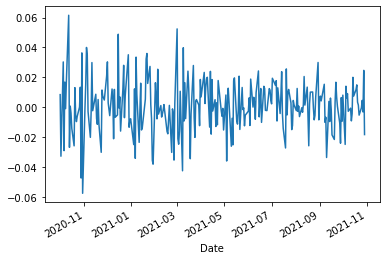

In [10]:
data_return.plot()
# Data goes up and down a lot but clusters aroung 0.00

<AxesSubplot:xlabel='Date'>

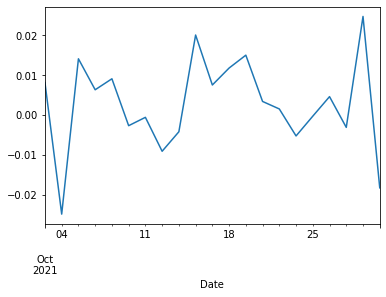

In [11]:
data_return[-21:].plot()
# Return over one month instead of one year to see details of variance

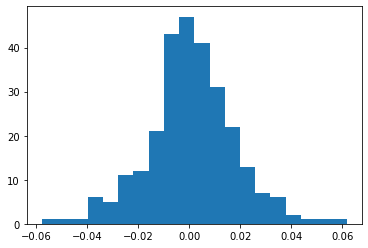

In [12]:
plt.hist(data_return, bins = 20);
# We can see we have a normal distribution

#### Calculation of the Inputs needed

In [13]:
S = data['Adj Close'][-1]
print('The spot price is', round(S,2), '$')
# To define the spot prince S

The spot price is 149.58 $


In [14]:
log_return = np.log(data['Adj Close'] / data['Adj Close'].shift(1))

In [15]:
vol = np.sqrt(252) * log_return.std()
print('The annualised volatility is', round(vol*100,2), '%')

The annualised volatility is 27.31 %


#### Final Data Input

In [16]:
S0 = 149.58             # spot stock price (in $)
K = 150.0               # strike (in $)
T = 1.0                 # maturity 
r = 0.2                 # risk free rate 
sig = 0.3               # diffusion coefficient or volatility (rounded to 0.3)
N = 5                   # number of periods or number of time steps
payoff = "put"          # payoff put or call

# T = 1 and N = 5 were chosen in order to have the values for a financial week

#### Model 1 : Binomial Price Trees

In [17]:
dT = float(T) / N                             # Delta t
u = np.exp(sig * np.sqrt(dT))                 # up factor
d = 1.0 / u                                   # down factor (opposite of up factor with 1/u)

In [18]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1
    
# We have here a 4x4 matrix with the spot price at the starting point
# Each loop z (the variable) is added +1 meaning we have a moving variable (the index is moving) forming a dynamic loop

In [19]:
S
# We have created the tree with N=5 to have 5 terms (one week)

array([[149.58      , 171.05676242, 195.61716787, 223.70396718,
        255.82348153, 292.55472992],
       [  0.        , 130.79971866, 149.58      , 171.05676242,
        195.61716787, 223.70396718],
       [  0.        ,   0.        , 114.37736597, 130.79971866,
        149.58      , 171.05676242],
       [  0.        ,   0.        ,   0.        , 100.01689591,
        114.37736597, 130.79971866],
       [  0.        ,   0.        ,   0.        ,   0.        ,
         87.45943205, 100.01689591],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,  76.47860079]])

In [20]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
p
# What is the risk neutral probability of it going up or down
# We use 1.0 here to make sure all the numbers are float numbers

0.6181466550278781

In [21]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V
# We now calculate the option value
# V represents the payoff value at maturity
# We will never see negative numbers on the payoff matrix as we would not execute

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        19.20028134],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        49.98310409],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        73.52139921]])

In [22]:
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V
# We now find the value of the option by creating a loop and telling the computer to do a binomial tree
# We have two loops: one calculates by column and one by row

array([[ 6.52225339,  3.15805537,  0.94816092,  0.        ,  0.        ,
         0.        ],
       [ 0.        , 12.66530803,  7.07296556,  2.58438512,  0.        ,
         0.        ],
       [ 0.        ,  0.        , 23.07183942, 15.09503534,  7.04421191,
         0.        ],
       [ 0.        ,  0.        ,  0.        , 38.45055605, 29.7410499 ,
        19.20028134],
       [ 0.        ,  0.        ,  0.        ,  0.        , 56.65898382,
        49.98310409],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        73.52139921]])

In [23]:
print('European ' + payoff, str( V[0,0].round(2)) + '$')
# At time 0 this is the option value

European put 6.52$


#### Model 2: Monte Carlo Simulation

In [24]:
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S
# The time stamps and the number of times we run the simulation will be 'p' while S0 is the starting point
# S[t] = yesterday's price multiplied by the exponential of r minus half sigma squared multiplied by dt plus sigma
    # multiplied by the square root of dt

In [25]:
T = 1.0        # maturity 
r = 0.2        # risk free rate 
sigma = 0.3   # diffusion coefficient or volatility
S0 = 149.58    # spot stock price (in $)
K = 150        # strike (in $)

In [26]:
S = mcs_simulation_np(1000)
# We used 1000 loops for the first Monte Carlo Simulation

In [27]:
S = np.transpose(S)
S

array([[149.58      , 149.92135163, 149.80548074, ..., 157.90824318,
        160.27904866, 157.7438812 ],
       [149.58      , 148.69166625, 149.31672861, ..., 275.24422909,
        282.13507128, 284.1832061 ],
       [149.58      , 149.48495234, 150.6168276 , ..., 179.82350004,
        178.00713466, 178.00947688],
       ...,
       [149.58      , 148.28860521, 146.68337382, ..., 211.0474454 ,
        211.64495779, 214.31518273],
       [149.58      , 154.2298574 , 153.84870007, ..., 292.93371884,
        293.86185614, 294.33839077],
       [149.58      , 150.18507044, 150.86114548, ..., 116.70372104,
        116.60888514, 115.89304027]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-period values')

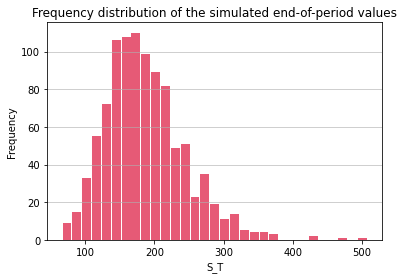

In [28]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#DC143C',alpha=0.7, rwidth=0.9)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-period values')
# We have a Log Normal distribution appearing on the graph

In [29]:
S = mcs_simulation_np(10000)
# Now we test with 10000 loops to confirm at a higher scale

In [30]:
S = np.transpose(S)
S

array([[149.58      , 149.27951577, 149.75992113, ..., 160.71272006,
        161.09849644, 160.62739996],
       [149.58      , 150.05088038, 149.78329362, ..., 196.80782258,
        196.9837996 , 196.41773725],
       [149.58      , 149.56064118, 149.2635208 , ..., 179.18092414,
        179.09113273, 178.84196593],
       ...,
       [149.58      , 149.40801237, 149.94294075, ..., 259.54865098,
        260.46470509, 261.70917803],
       [149.58      , 149.28466003, 148.82567259, ..., 136.38469839,
        136.48941397, 136.3246987 ],
       [149.58      , 149.09272384, 150.20896001, ..., 197.00187702,
        197.31249097, 197.30991885]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-period values')

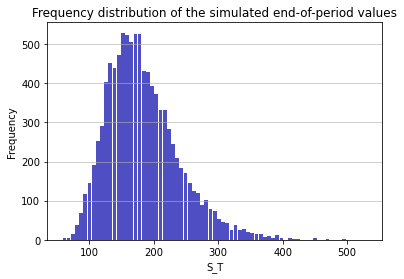

In [31]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.9)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-period values')
# We now have a smoother Log Normal Distribution, as expected

In [32]:
p = np.mean(np.maximum(K - S[:,-1],0))
print('European put', str((p).round(2)), '$')

European put 7.34 $


In [33]:
c = np.mean(np.maximum(S[:,-1] - K,0))
print('European call', str((c).round(2)), '$')

European call 40.56 $


By selecting the put price (7.68 $) from the Monte Carlo simulation we have a higher confidence level considering
we used a 10000 loop test which also graphed a perfect example of a Log Normal distribution.
Further than numerically, the theoretical implications of the model prove it is stronger as it is considered
to be the most powerful and flexible in finance.
(Hilpisch, Y., 2018. Python for finance: mastering data-driven finance. O'Reilly Media.)

### Analysis with Greeks

### Delta

#### 2D Delta

In [34]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0)
    
    return delta

In [35]:
D_C = delta(149, 150, 1, 0.02, 0.01, 0.3, 'call')
D_C
# This is the Delta for the call option with a spot price of 149,58
# When the price increases 1$ then the option value (all remaining equal) will increase 0.56$ 
# We know the Delta is chained to the option price

0.5583561817938071

In [36]:
D_P = delta(149, 150, 1, 0.02, 0.01, 0.3, 'put')
D_P
# We have a negative value because when the price inceases the put option decreases 
# When the price increases 1$ then the option price decreases 43 cents

-0.431693651955361

In [37]:
D_C - D_P
# Very close to 1

0.9900498337491681

In [38]:
S = np.linspace(50,150,11)
Delta_Call = np.zeros((len(S),1))
Delta_Put = np.zeros((len(S),1))
for i in range(len(S)):
    Delta_Call [i] = delta(S[i], 150, 1, 0.02, 0.01, 0.3, 'call')
    Delta_Put [i] = delta(S[i], 150, 1, 0.02, 0.01, 0.3, 'put')

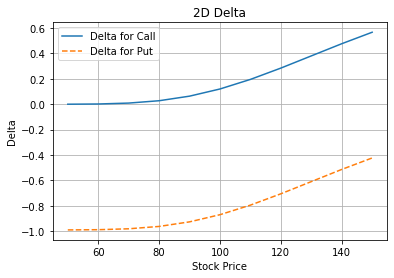

In [39]:
fig = plt.figure()
plt.plot(S, Delta_Call, '-')
plt.plot(S, Delta_Put, '--')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.title('2D Delta')
plt.legend(['Delta for Call','Delta for Put'])
# We now have the 2D graph for Delta, which we confirm is correct as the Call line starts at approx. 0.0
# and the Put line starts at approx. -1.0

#### 3D Delta

In [40]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(- q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(- q * T) * si.norm.cdf(- d1, 0.0, 1.0)
    
    return delta

In [41]:
S = np.linspace(50, 150, 51)
T = np.linspace(0.5, 5, 51)
Delta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Delta[i,j] = delta(S[j], 150, T[i], 0.02, 0.01, 0.3, 'put')

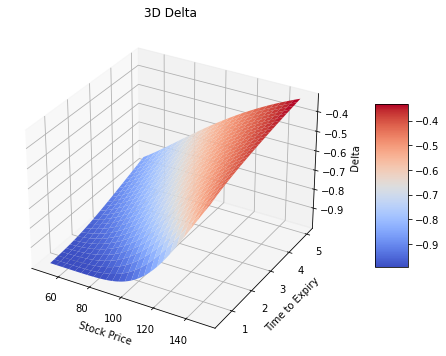

In [42]:
fig = plt.figure(figsize=(15, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Delta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')
ax.set_title('3D Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [43]:
d = delta(149, 150, 1, 0.02, 0.01, 0.3, 'call')
print('The value of Delta is', d.round(4),'.','The 2D and 3D illustrations show that if the stock price increase 1 dollar, then the value of the option will increase $', d.round(4), '.')

The value of Delta is 0.5584 . The 2D and 3D illustrations show that if the stock price increase 1 dollar, then the value of the option will increase $ 0.5584 .


### Gamma

#### 2D Gamma

In [44]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [45]:
gamma(149, 150, 1, 0.02, 0.01, 0.3, 'call')

0.008722246525330313

In [46]:
gamma(149, 150, 1, 0.02, 0.01, 0.3, 'put')

0.008722246525330313

Since it is the same formula for Gamma then we have the same results for call & put

In [47]:
S = np.linspace(50,150,11)
Gamma = np.zeros((len(S),1))
for i in range(len(S)):
    Gamma [i] = gamma(S[i], 150, 1, 0.02, 0.01, 0.3, 'call')

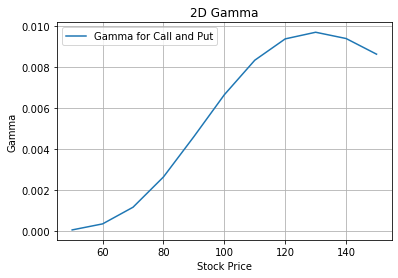

In [48]:
fig = plt.figure()
plt.plot(S, Gamma, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.title('2D Gamma')
plt.legend(['Gamma for Call and Put'])
# All the values are extremely close to 0
# The values near 0.010 show how much it will change at the first value for Delta

#### 3D Gamma

In [49]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- r * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [50]:
S = np.linspace(50, 150, 51)
T = np.linspace(0.5, 5, 51)
Gamma = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Gamma[i,j] = gamma(S[j], 150, T[i], 0.02, 0.01, 0.3, 'put')

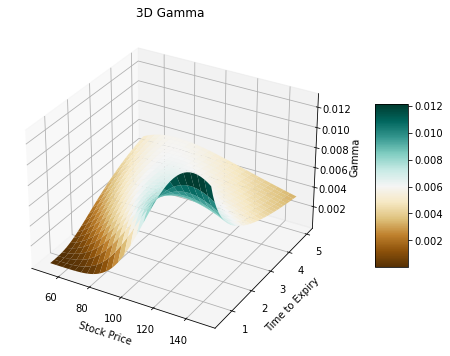

In [51]:
fig = plt.figure(figsize=(15, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Gamma, rstride=2, cstride=2, cmap=plt.cm.BrBG, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Gamma')
ax.set_title('3D Gamma')
fig.colorbar(surf, shrink=0.5, aspect=5);

### Speed

#### 2D Speed

In [52]:
def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = - np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * np.sqrt(T)) * (d1 + vol * np.sqrt(T))
    
    return speed

In [53]:
speed(149, 150, 1, 0.02, 0.01, 0.3, 'call')

-8.996142748073332e-05

In [54]:
speed(149, 150, 1, 0.02, 0.01, 0.3, 'put')

-8.996142748073332e-05

In [55]:
S = np.linspace(50,150,11)
Speed = np.zeros((len(S),1))
for i in range(len(S)):
    Speed [i] = speed(S[i], 150, 1, 0.02, 0.01, 0.3, 'put')

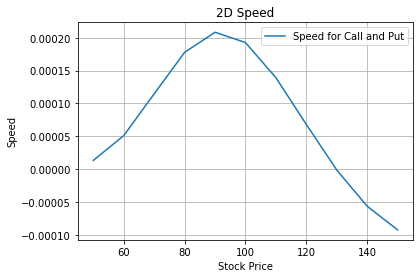

In [56]:
fig = plt.figure()
plt.plot(S, Speed, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Speed')
plt.title('2D Speed')
plt.legend(['Speed for Call and Put'])
# This confirms the Delta is positive at first and then decreases 
# So if at 100$ the Gamma will increase 0.00022 and then it will decrease, down to the negatives

#### 3D Speed

In [57]:
def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = - np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * np.sqrt(T)) * (d1 + vol * np.sqrt(T))
    
    return speed

In [58]:
S = np.linspace(50, 150, 51)
T = np.linspace(0.5, 5, 51)
Speed = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Speed[i,j] = speed(S[j], 150, T[i], 0.02, 0.01, 0.3, 'put')

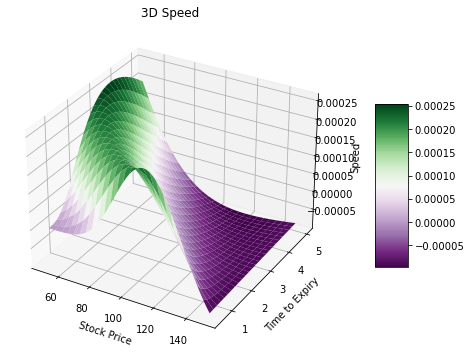

In [59]:
fig = plt.figure(figsize=(15, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Speed, rstride=2, cstride=2, cmap=plt.cm.PRGn, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Speed')
ax.set_title('3D Speed')
fig.colorbar(surf, shrink=0.5, aspect=5);

### Rho

#### 2D Rho

In [60]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [61]:
rho(149, 150, 1, 0.02, 0.01, 0.3, 'call')

65.38997156281751

In [62]:
rho(149, 150, 1, 0.02, 0.01, 0.3, 'put')

-81.63982943319577

We have very large numbers here, showing that when the increase rate goes up 1 or 100 percent then the price goes up 65.4 USD.
This is highly unlikely or even impossible.
So to be more realistic, if the interest rates went up 0.1 percent then the price will increase 0.00654 USD.

In [63]:
r = np.linspace(0,0.1,11)
Rho_Call = np.zeros((len(r),1))
Rho_Put = np.zeros((len(r),1))
for i in range(len(r)):
    Rho_Call [i] = rho(149, 150, 1, r[i], 0.01, 0.3, 'call')
    Rho_Put [i] = rho(149, 150, 1, r[i], 0.01, 0.3, 'put')

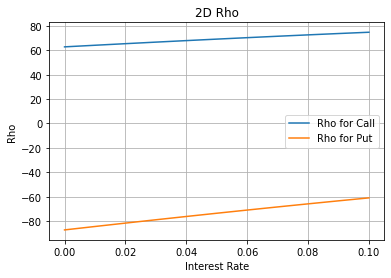

In [64]:
fig = plt.figure()
plt.plot(r, Rho_Call, '-')
plt.plot(r, Rho_Put, '-')
plt.grid()
plt.xlabel('Interest Rate')
plt.ylabel('Rho')
plt.title('2D Rho')
plt.legend(['Rho for Call', 'Rho for Put'])

#### 3D Rho

In [65]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [66]:
S = np.linspace(50, 150, 51)
T = np.linspace(0.5, 5, 51)
Rho = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Rho[i,j] = rho(S[j], 150, T[i], 0.02, 0.01, 0.3, 'put')

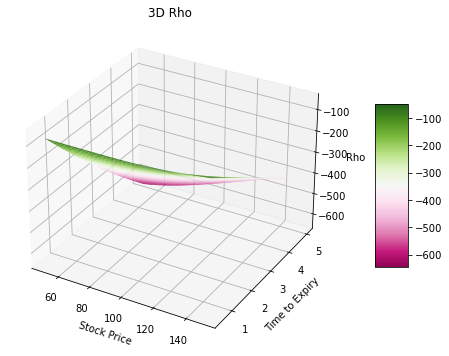

In [67]:
fig = plt.figure(figsize=(15, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Rho, rstride=2, cstride=2, cmap=plt.cm.PiYG, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Rho')
ax.set_title('3D Rho')
fig.colorbar(surf, shrink=0.5, aspect=5);

### Vega


#### 2D Vega

In [68]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [69]:
vega(149, 150, 1, 0.02, 0.01, 0.3, 'call')

58.09277853265749

In [70]:
vega(149, 150, 1, 0.02, 0.01, 0.3, 'put')

58.09277853265749

Since there is only one formula, we once again have the same values for both the call and put.
These are high numbers, when the volatility increases 10% (0.1) then the price increases 5.8$.
This is normal for volatility, especially when we compare to the VIX

In [71]:
vol = np.linspace(0.1,0.4,13)
Vega = np.zeros((len(vol),1))
for i in range(len(vol)):
    Vega [i] = vega(149, 150, 1, 0.02, 0.01, vol[i], 'put')

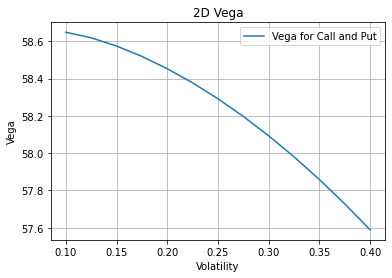

In [72]:
fig = plt.figure()
plt.plot(vol, Vega, '-')
plt.grid()
plt.xlabel('Volatility')
plt.ylabel('Vega')
plt.title('2D Vega')
plt.legend(['Vega for Call and Put'])

#### 3D Vega

In [73]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [74]:
S = np.linspace(50, 150, 51)
T = np.linspace(0.5, 5, 51)
Vega = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Vega[i,j] = vega(S[j], 150, T[i], 0.02, 0.01, 0.3, 'put')

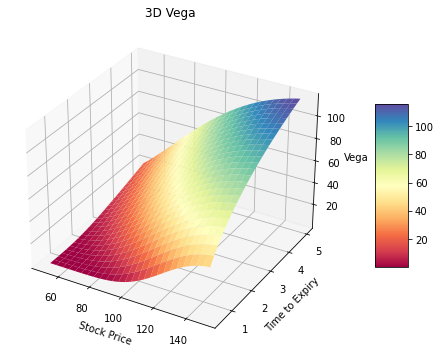

In [75]:
fig = plt.figure(figsize=(15, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Vega, rstride=2, cstride=2, cmap=plt.cm.Spectral, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Vega')
ax.set_title('3D Vega')
fig.colorbar(surf, shrink=0.5, aspect=5);